In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Housing.csv")

In [112]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [115]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(i + " Histogram")
    plt.show()
    plt.savefig("./imgs/"+i+"_scatter_plot.png")  # Uncomment this line to save the plots as images

NameError: name 'plt' is not defined

In [117]:
df.groupby("bedrooms").bedrooms.count()

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: bedrooms, dtype: int64

In [118]:
df.groupby(["bedrooms","bathrooms"]).price.max()

bedrooms  bathrooms
1         1             3150000
2         1             7070000
          2             6685000
3         1             9800000
          2            12250000
          3            10850000
4         1            11410000
          2            13300000
          3            10150000
          4            12250000
5         1             8120000
          2             8400000
          3            10150000
6         1             3500000
          2             6083000
Name: price, dtype: int64

In [119]:
for i in df.columns:
    print(i)

price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


In [120]:
cols_with_categorical_values = list(n for n in df.columns if df[n].dtypes == "object")
cols_with_categorical_values

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [121]:
len(df.mainroad.unique())

2

In [122]:
cardinality_of_cat_cols = {n: len(df[n].unique()) for n in cols_with_categorical_values}
cardinality_of_cat_cols

{'mainroad': 2,
 'guestroom': 2,
 'basement': 2,
 'hotwaterheating': 2,
 'airconditioning': 2,
 'prefarea': 2,
 'furnishingstatus': 3}

In [123]:
catname_of_cat_cols = {n: list(df[n].unique()) for n in cols_with_categorical_values}
catname_of_cat_cols

{'mainroad': ['yes', 'no'],
 'guestroom': ['no', 'yes'],
 'basement': ['no', 'yes'],
 'hotwaterheating': ['no', 'yes'],
 'airconditioning': ['yes', 'no'],
 'prefarea': ['yes', 'no'],
 'furnishingstatus': ['furnished', 'semi-furnished', 'unfurnished']}

In [124]:
mapping = {"yes": 1, "no": 0}
for i in [key for key, value in cardinality_of_cat_cols.items() if value == 2]:
    df[i].map(mapping)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X = df.drop(["price"], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.3)

In [127]:
from sklearn.preprocessing import OneHotEncoder
OH_encode = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_labeles_train = pd.DataFrame(OH_encode.fit_transform(X_train[['furnishingstatus']]))
encoded_labeles_test = pd.DataFrame(OH_encode.transform(X_test[['furnishingstatus']]))

In [128]:
encoded_labeles_train.index = X_train.index
encoded_labeles_test.index = X_test.index

In [129]:
encoded_labeles_train.columns = list(X['furnishingstatus'].unique())
encoded_labeles_test.columns = list(X['furnishingstatus'].unique())

In [130]:
X_train = X_train.drop(cols_with_categorical_values, axis=1)
X_test = X_test.drop(cols_with_categorical_values, axis=1)

In [131]:
X_train = pd.concat([X_train, encoded_labeles_train], axis=1)
X_test= pd.concat([X_test, encoded_labeles_test], axis=1)

In [132]:
temp = pd.concat([X_train, y_train], axis=1)

<Axes: >

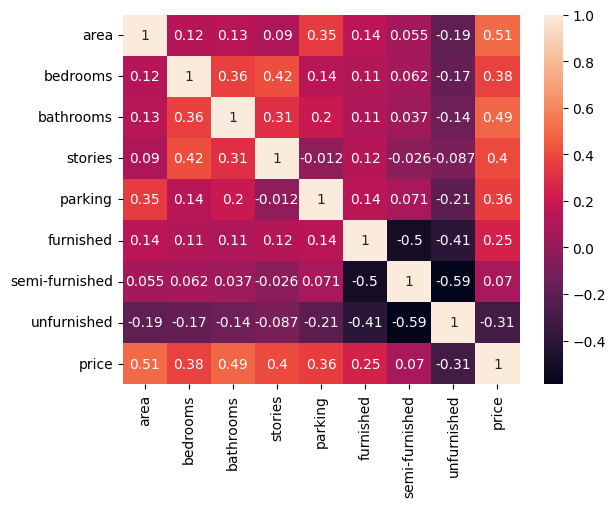

In [133]:
import seaborn as sns
cor = temp.corr()
sns.heatmap(cor, annot=True)

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
df.isna().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [136]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [137]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [138]:
print(list(X_test.columns))
print(list(X_train.columns))

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnished', 'semi-furnished', 'unfurnished']
['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnished', 'semi-furnished', 'unfurnished']


In [139]:
preds = model.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

935476.5951219513

In [142]:
model.score(X_test, y_test) * 100

50.07572291186983